# Властелин колец: Карта Всевластия 2

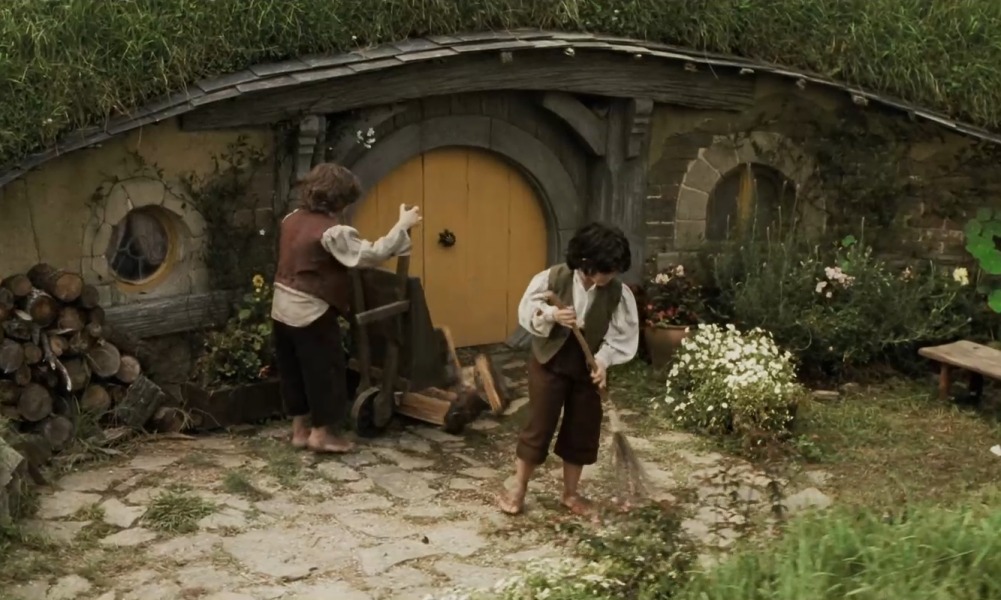

Напомню формальную постановку задачи:

- в Википедии можно открыть случайную статью по специальной ссылке
- Кликая на слова в статье, мы можем переходить на другие статьи Википедии
- Нам нужно дойти до статьи в Википедии про [Мордор](https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D1%80%D0%B4%D0%BE%D1%80)
- На поиск будет дано определенное время
- Выигрывает тот, кто дошел до статьи про Мордор за наименьшее число шагов. Если таких людей несколько, то выигрывает тот, кто сделал это быстрее всех
- Также нужно показать, какой путь был использован (напечатать в конце переходы)

В этой части задания вам нужно будет дописать недостающий код в файле `wiki_crawler.py`


### Как все будет работать

- открываем случайную статью на википедии
- достаем из нее все ссылки на другие статьи
- начинаем по очереди переходить по всем этим ссылкам
- внутри этих новых статей будут еще ссылки, мы их тоже запомним, но посещать уже будем после того, как посмотрим ссылки первого уровня
- если все ссылки закончились и мы не дошли до Мордора, то пути до него от данной статьи нет
- если какая-то ссылка ведет в статью про Мордор, то мы показываем, по каким ссылкам нужно ткнуть, чтобы до него дойти (и сколько шагов это заняло)

*Пример:*
В статье "Собака" можно ткнуть на ссылку "Англия", из нее на статью про Джона Толкина и оттуда на Мордор (3 шага)

### Как в программе лазить по веб-страницам?

Для этого есть специальные web-crawler'ы, которые переходят по страницам и возвращают с них информацию. Мы будем пользоваться [scrapy](https://scrapy.org/), он позволяет легко переходить по страницам и может обрабатывать страницы асинхронно. Вам в том, как он работает, не нужно разбираться, за вас этот код уже написан, нужно лишь позвать подходящие функции. Но общий принцип работы нам понять нужно:
- для каждой страницы википедии будет вызываться метод `parse` из класса `WikiCrawler`
- внутри класса можно сохранить какую-то информацию, чтобы пользоваться ей в разных вызовах метода `parse`
- первый адрес, по которому переходим, записан в `start_urls`
- чтобы указать, куда идти дальше, нужно написать в методе `parse` строчку `yield response.follow(url, self.parse)`. `url` - адрес, куда идти дальше, `self.parse` - какой метод для него вызывать (вызываем тот же самый `parse`)


### Узлы и итоговый путь

Попробуем написать класс `Node` и метод `__build_path`.

Метод должен показать найденный путь в формате
```
X -> Y -> Z
```
где X - стартовая статья
Y, Z - ссылки, по которым переходили
Например, если мы начали со статьи про собак, то метод должен вывести
```
Собака — Википедия -> Англии -> Джон Толкин -> Мордор
```
* "Собака - Википедия" - название самой первой статьи
* "Англии" - ссылка, на которую мы ткнули потом
* "Джон Толкин" - ткнули на эту ссылку потом
* "Мордор" - наша финальная ссылка

В итоге:
- метод принимает в себя последний узел в пути до Мордора
- метод возвращает полный путь до этого узла (строку), то есть из узла можно получить информацию о предыдущих узлах
- для каждого узла печатается заголовок статьи, так что ее тоже нужно сохранить

К тому же давайте посмотрим на метод `__show_path`. Он за вас уже написан, но обратите внимание, он печатает на экран, в том числе количество шагов, которые мы прошли до текущего узла. Это избыточная информация, ее можно получить из количества `prev`, которые мы напечатаем, но так просто удобнее. Надо будет эту информацию тоже сохранять.

Напишите:
- конструктор `Node` (он должен иметь три атрибута - название статьи `title`, предыдущий узел в цепочке `prev` и количество пройденных шагов - `steps`)
- метод `__build_path` (он как раз таки будет использовать эту информацию из узла, `prev` для стартового узла будет `None`)



### BFS

Теперь давайте напишем три метода в классе `BFS` - конструктор и методы `push_node` и `pop_node`. Этот класс нужен, чтобы запоминать в нем, какие статьи нам нужно еще посетить и какую именно статью посещать следующей.

Напишем `push_node`:
- на вход нам дают очередной узел
- нужно проверить, не посещали ли мы уже его (можно проверить `url`, то есть в класс `Node` нужно добавить еще один атрибут. просто проверить `title` не получится - мы сохраняем текст ссылки, на которую кликаем, а не название статьи, т.е. нам могут попасться ссылки "Англии" и "Англией" и мы воспримем их как разные статьи. поэтому нужен `url` страницы)
- если не посещали, то добавляем его в список на посещение (и запоминаем, что теперь посетили)

Получается, внутри класса `BFS` нам потребуются:
- `visited` - `set`(множество) `url`-ов, которые мы уже посетили
- `nodes` - список узлов, которые нам еще предстоит посетить

Именно их необходимо проинициализировать в конструкторе (никакие параметры внутрь конструктора передавать не нужно)

Теперь напишем последний метод - `pop_node`:
- если в `nodes` нет узлов, то вернем `None`
- иначе выбросим из `nodes` нулевой узел и вернем его пользователю (для этого нам нужен метод `pop` у листа)

**Не забудьте также добавить `url` в атрибуты `Node`**

### __find_relevant

Теперь напишем метод `__find_relevant`. В чем его суть:
- в него мы будем передавать все ссылки с текущей страницы (уже преобразованные в `Node`'ы)
- мы хотим оставить только те ссылки, которые потенциально ведут к статье про Мордор (пусть даже не сразу, а через несколько шагов)
- если мы такие ссылки не нашли, то оставляем все со страницы

Например, в статье про собаку логично оставить ссылки, в которых упоминается Англия, поскольку Джон Толкин из Англии.
Если мы будем оставлять вообще все ссылки, то поиск пути будет занимать очень много времени.  

Это задание творческое, какие узлы оставлять, а какие убирать - решаете вы, главное, не убрать нужные и все таки дойти до статьи про Мордор, если это возможно. Пример того, как может работать метод, описан в комментарии к `__find_relevant`, но точно так же делать необязательно.

### parse

Осталось написать только основной метод нашего класса и все готово. Инструкции, как его писать, находятся в самом методе в комментариях. Обратите внимание на атрибут `cur`, он нужен, чтобы записывать в него текущий узел, с которым мы работаем. Сначала он выставлен в `None`, поскольку мы не знаем, в какую именно случайную статью мы перейдем. Он нужен в процессе, чтобы помнить, из какого узла мы пришли.

### Как сдать лабу

Эта часть лабы будет протестирована вручную преподом. Это будет сделано после дедлайна, так что если вы не уверены в правильности своего решения, то обязательно спросите до дедлайна, **позже исправить уже будет нельзя**!